# PART I: EDA and Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original = pd.read_csv('train.csv')
original.set_index('id', inplace=True)
original.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,y
id,,,,,,,,,,,,,,,,,,,,,
0,33,Private,34,26,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Adm support including clerical,...,China,China,Taiwan,Foreign born- Not a citizen of U S,2,Not in universe,2,52,95,50000+.
1,63,Private,7,22,Some college but no degree,0,Not in universe,Never married,Manufacturing-durable goods,Adm support including clerical,...,?,?,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
2,71,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
3,43,Local government,43,10,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Education,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
4,57,Local government,40,32,Some college but no degree,0,Not in universe,Widowed,Entertainment,Other service,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.


In [3]:
trainx = pd.read_csv('X_train', index_col='id')
trainx.head()

,age,Private,Self-employed-incorporated,State government,Self-employed-not incorporated,Not in universe,Without pay,Federal government,Never worked,Local government,...,1.2,Not in universe.12,Yes.3,No.3,2.3,0.3,1.3,weeks worked in year,94,95
id,,,,,,,,,,,,,,,,,,,,,
0,33,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,52,0,1
1,63,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,52,0,1
2,71,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,43,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,52,0,1
4,57,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,52,0,1


In [4]:
trainy = pd.read_csv('Y_train', index_col='id')
trainy.head()

,label
id,
0,1
1,0
2,0
3,0
4,0


In [5]:
trainx.shape

(54256, 510)

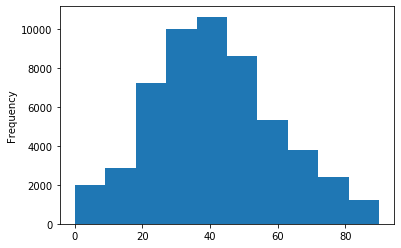

In [6]:
trainx.age.plot(kind='hist')

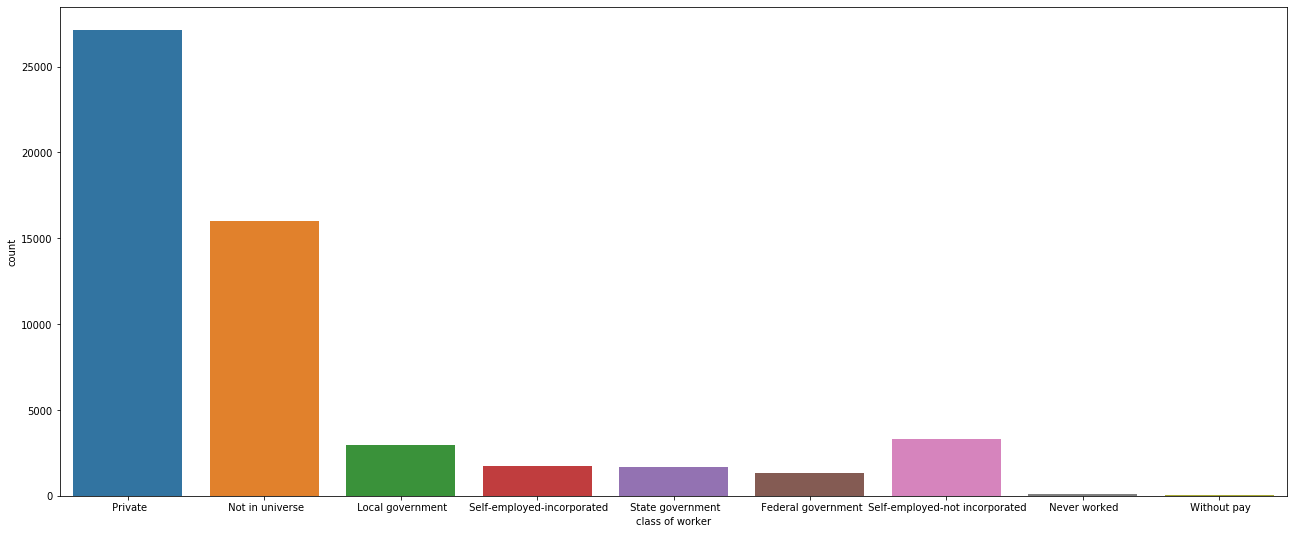

In [7]:
plt.figure(figsize=(22,9))
sns.countplot(x='class of worker', data=original)

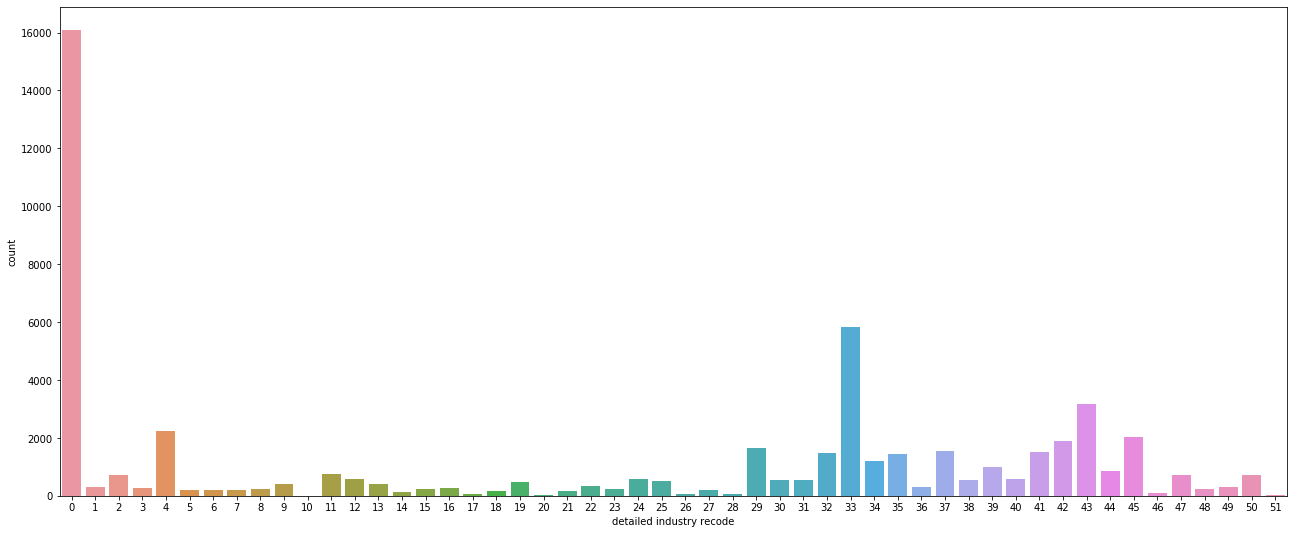

In [8]:
plt.figure(figsize=(22,9))
sns.countplot(x='detailed industry recode', data=original) 

we have abount 51 industries. Most of them are recoded as 0 which stands for **Not in Universe**

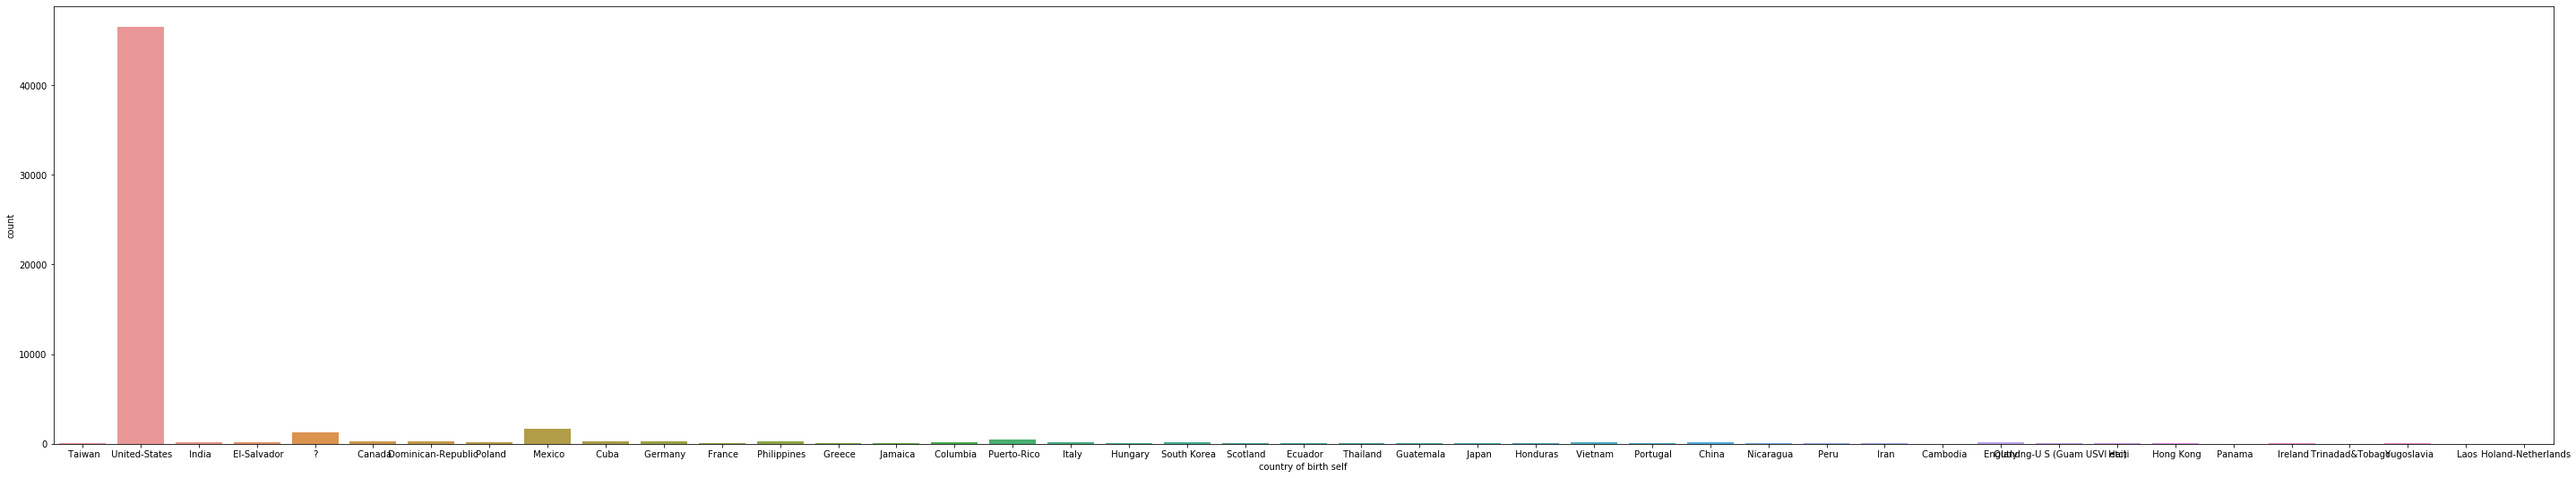

In [9]:
plt.figure(figsize=(50,9))
sns.countplot(x='country of birth self', data=original) 

most of the individuals were born in the US. Others are probably immigrant?

In [10]:
import missingno as msno 

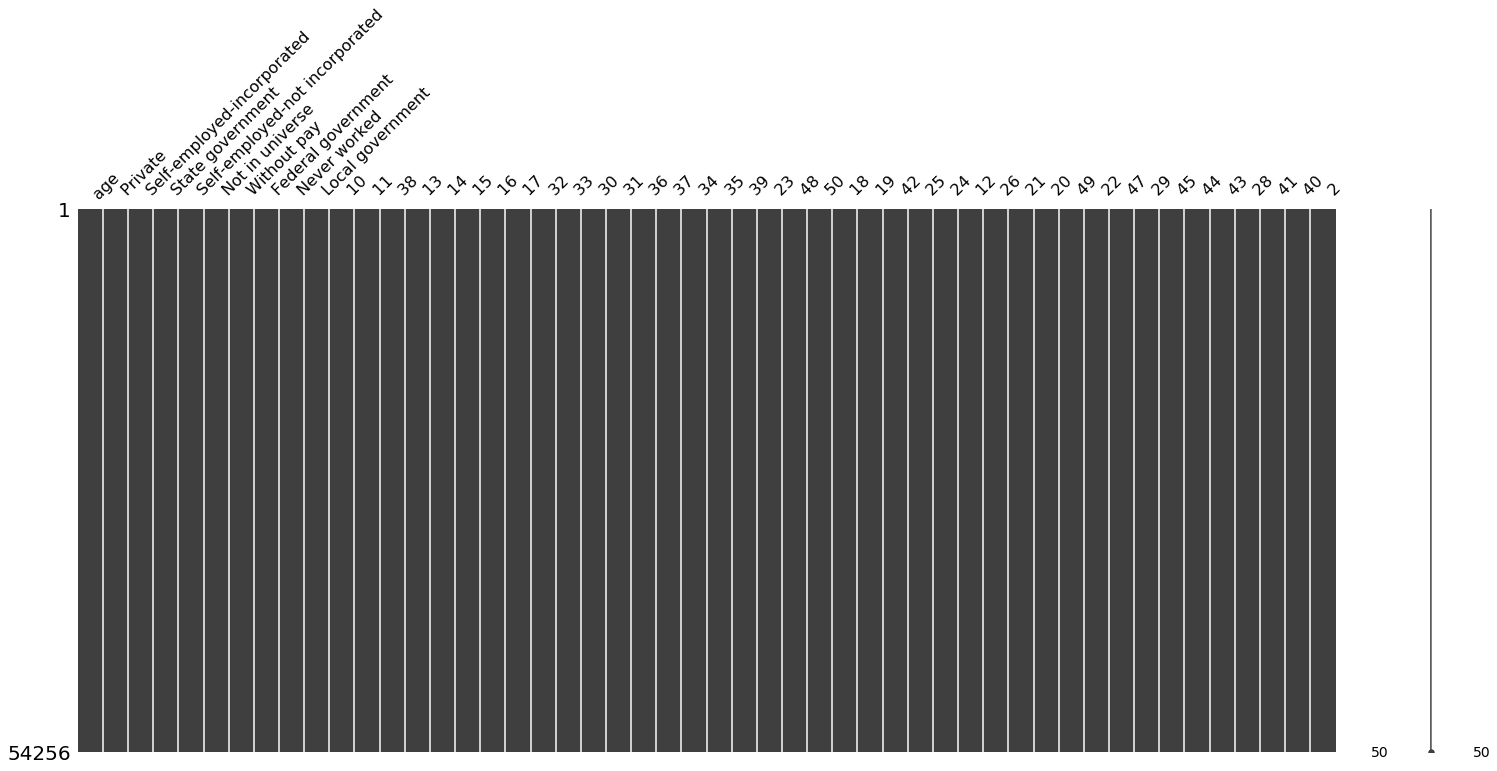

In [11]:
msno.matrix(trainx.iloc[:,:50])

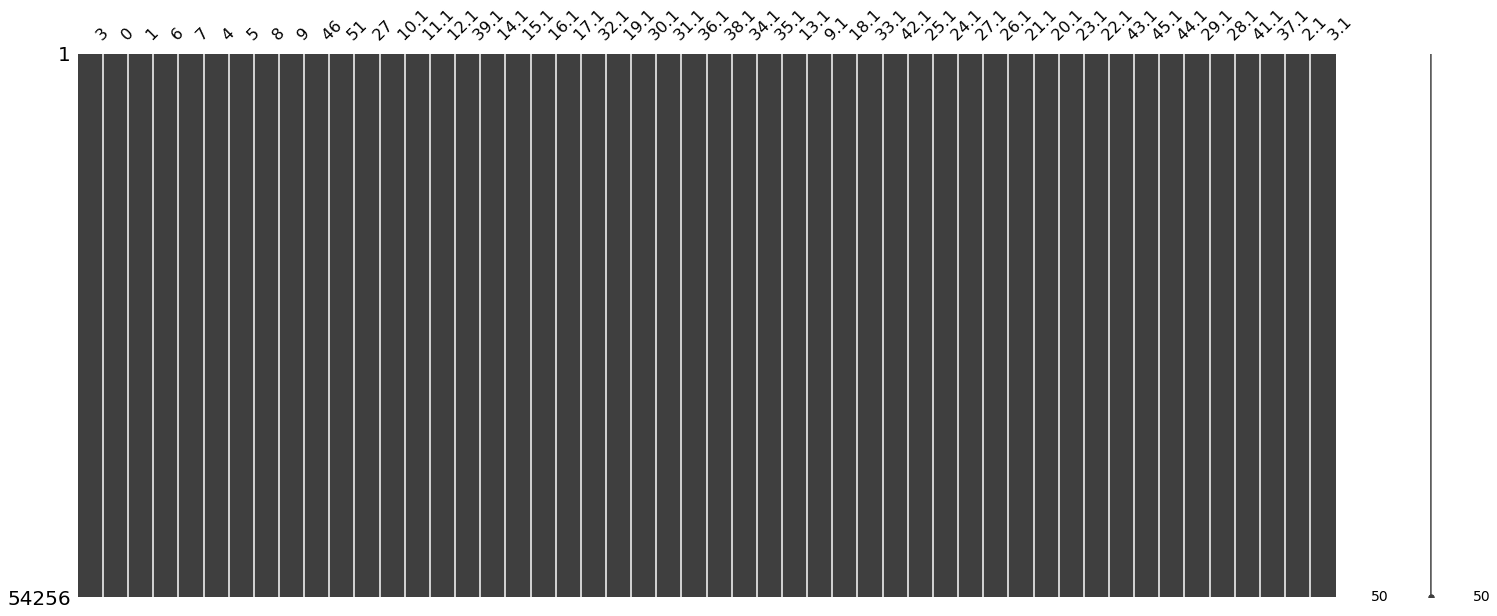

In [12]:
msno.matrix(trainx.iloc[:,50:100])

In [13]:
ms = trainx.isna().sum().sort_values(ascending= False)
ms

 95                                       0
 Armed Forces.1                           0
 Other service                            0
 Technicians and related support          0
 Machine operators assmblrs & inspctrs    0
                                         ..
 Different state in Northeast             0
 Different state in Midwest               0
 Nonmover.2                               0
 Different county same state.1            0
age                                       0
Length: 510, dtype: int64

we have no missing values, thanks to the organizer.

Next, we can run a random forest to see what are some important features.

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [15]:
rfc.fit(trainx, trainy)

/Users/tianxiangzhou/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/tianxiangzhou/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

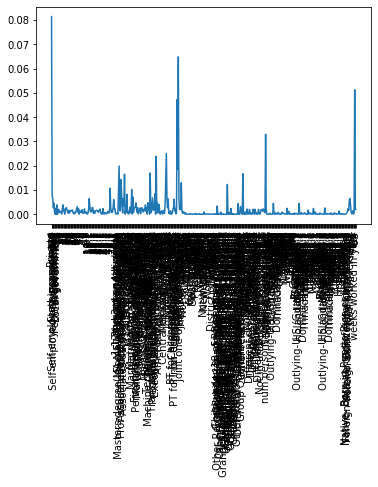

In [16]:
plt.plot(rfc.feature_importances_)
plt.xticks(np.arange(trainx.shape[1]),trainx.columns.to_list(), rotation=90);

Looks very messy. We can do something to only extract first few important indices. 

In [17]:
importances = rfc.feature_importances_

In [18]:
indices = np.argsort(importances)[::-1][:10] #extract first 10 important features, ::-1 to reverse order

In [19]:
print("Feature ranking:")
for i in range(len(indices)):
    print(i + 1, trainx.columns[i], ":", importances[indices[i]])

Feature ranking:
1 age : 0.08139687419555178
2  Private : 0.06482519599930238
3  Self-employed-incorporated : 0.05123897459251865
4  State government : 0.04722601952682516
5  Self-employed-not incorporated : 0.032959024156121106
6  Not in universe : 0.025047372861643713
7  Without pay : 0.023886931191247924
8  Federal government : 0.01988233153248637
9  Never worked : 0.018537373948140014
10  Local government : 0.017005272286814532


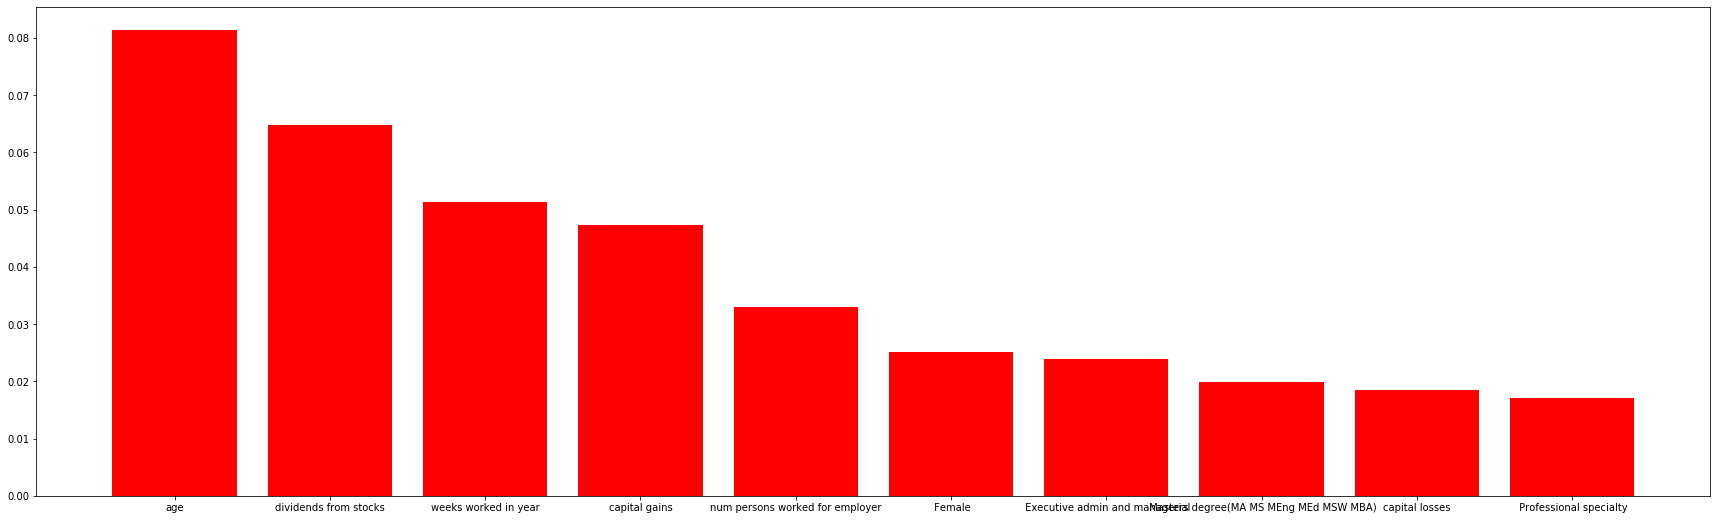

In [20]:
plt.figure(figsize=(30,9))
plt.bar(range(10), importances[indices],
        color="r", align="center")
plt.xticks(range(10),trainx.columns[indices]);

Age is an important factor of how much money a person makes. Someone might be retired at the age of 80 and he/she probably doesn't make over 50000 dollars. Let's see if that's true.

In [21]:
df = trainx #let's use df to indicate the whole dataset encoded
df['label'] = trainy
df.head()

,age,Private,Self-employed-incorporated,State government,Self-employed-not incorporated,Not in universe,Without pay,Federal government,Never worked,Local government,...,Not in universe.12,Yes.3,No.3,2.3,0.3,1.3,weeks worked in year,94,95,label
id,,,,,,,,,,,,,,,,,,,,,
0,33,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,52,0,1,1
1,63,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,52,0,1,0
2,71,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,43,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,52,0,1,0
4,57,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,52,0,1,0


In [24]:
df.age[df.age < 50]

id
0        33
3        43
5        42
6        16
7        16
         ..
54251    43
54252    30
54253    16
54254    48
54255    48
Name: age, Length: 38113, dtype: int64

In [25]:
df['age below fifty'] = df.age < 50

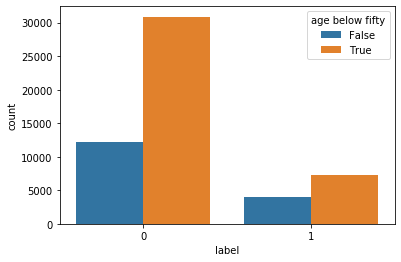

In [26]:
sns.countplot('label', data=df, hue = 'age below fifty')

- for people who make less than 50000: younger > older 
- for people who make more than 50000: younger > older
- most older people(>50) make less than 50000 as we expected

Lets find out if we can do something extra with the cleaned dataset. Starting by **dropping all columns with the same value.**

In [27]:
feature_counts = trainx.nunique(dropna=False)

In [28]:
feature_counts.sort_values()[:5]

 Grandchild <18 never marr RP of subfamily    1
 Other Rel <18 ever marr not in subfamily     1
 Not in universe.7                            2
 Different state in West                      2
 Different county same state.1                2
dtype: int64

In [29]:
trainx[' Grandchild <18 never marr RP of subfamily']

id
0        0
1        0
2        0
3        0
4        0
        ..
54251    0
54252    0
54253    0
54254    0
54255    0
Name:  Grandchild <18 never marr RP of subfamily, Length: 54256, dtype: int64

In [30]:
feature_counts[feature_counts==1].index

Index([' Other Rel <18 ever marr not in subfamily', ' Grandchild <18 never marr RP of subfamily'], dtype='object')

In [31]:
constant_features = feature_counts[feature_counts==1].index.tolist()
constant_features

[' Other Rel <18 ever marr not in subfamily',
 ' Grandchild <18 never marr RP of subfamily']

In [32]:
trainx.drop(constant_features, axis=1, inplace=True) ##drop these columns

Cool, now we can work on removing replicated features.

In [33]:
from tqdm.notebook import tqdm ##for progress far

In [34]:
def find_duplicate_columns(df = df):
    dup_cols = {}
    for i, c1 in enumerate(tqdm(df.columns)):
        for c2 in df.columns[i+1:]:
            if c2 not in dup_cols and np.all(df[c1] == df[c2]):
                dup_cols[c2] = c1
    return dup_cols

In [35]:
dcs = find_duplicate_columns(df = trainx)

In [36]:
dcs

{' New entrant': ' Never worked',
 ' Wholesale trade': ' 32',
 ' Retail trade': ' 33',
 ' Communications': ' 30',
 ' Utilities and sanitary services': ' 31',
 ' Private household services': ' 36',
 ' Personal services except private HH': ' 39',
 ' Medical except hospital': ' 42',
 ' Transportation': ' 29',
 ' Other professional services': ' 45',
 ' Social services': ' 44',
 ' Education': ' 43',
 ' Hospital services': ' 41',
 ' Entertainment': ' 40',
 ' Mining': ' 3',
 ' 0.1': ' 0',
 ' Not in universe or children': ' 0',
 ' Not in universe.2': ' 0',
 ' Construction': ' 4',
 ' Forestry and fisheries': ' 46',
 ' 46.1': ' 51',
 ' Armed Forces': ' 51',
 ' Armed Forces.1': ' 51',
 ' Private household services.1': ' 27.1',
 ' Protective services': ' 28.1',
 ' Not in universe.6': ' Not in universe.5',
 ' Abroad.2': ' Abroad',
 ' Abroad.3': ' Abroad',
 ' Not in universe.8': ' Not in universe.7',
 ' Not in universe.9': ' Not in universe.7',
 ' Nonmover.1': ' Nonmover',
 ' Nonmover.2': ' Nonmover

In [37]:
trainx.drop(dcs.keys(), axis=1, inplace=True)

In [38]:
trainx.shape

(54256, 471)